## Ejercicio 3

* **Use minimos cuadrados para determinar la relacion entre el precio del bitcoin y los precios de las materias primas: el petroleo, la plata y el oro durante el ultimo año.**

---

Primero lo que vamos a hacer es leer el data del precio del bitcoin y de las materias primas pedidas (petroleo, plata y oro) en el ultimo año (desde 15/03/2021 hasta 15/03/2022)

In [1]:
using CSV
using DataFrames

#Data del Bitcoin
dataBitcoin = CSV.read("data/Bitcoin3.csv",DataFrame);
dataBitcoin.Price .= replace.(dataBitcoin.Price, "," => "");
dataBitcoin.PriceFloat = parse.(Float64, dataBitcoin.Price);
dBDate = dataBitcoin.Date


#Data de la Plata
dataSilver = CSV.read("data/Silver.csv",DataFrame);
dSPrice = dataSilver.Price;
dSDate = dataSilver.Date;

#Data de el Oro
dataGold = CSV.read("data/Gold.csv",DataFrame);
dGPrice = dataGold.Price;
dGDate = dataGold.Date;

#Data del Petróleo
dataOil = CSV.read("data/CrudeOil.csv",DataFrame);
dOPrice = dataOil.Price;
dODate = dataOil.Date;


#Utilizamos las fechas en común
comun = intersect(dSDate,dODate,dGDate,dBDate);


#Se restringe la data con las fechas en común
dataBitcoin=dataBitcoin[in(comun).(dBDate), :];
dataSilver=dataSilver[in(comun).(dSDate), :];
dataGold=dataGold[in(comun).(dGDate), :];
dataOil=dataOil[in(comun).(dODate), :];

(Se restringe los datos ya que algunos dias no hay registro del precio de las materias primas)

In [2]:
#Utilizamos el data del precio ya restringida
dSPrice = dataSilver.Price;

dOPrice = dataOil.Price;

dataGold.Price .= replace.(dataGold.Price, "," => "");
dGPrice = parse.(Float64, dataGold.Price);

dataBitcoin.Price .= replace.(dataBitcoin.Price, "," => "");
dBPrice = parse.(Float64, dataBitcoin.Price);

Ya con los datos leidos vamos a plantear el siguiente método multilineal por mínimos cuadrados:

$$\alpha_1 + \alpha_2 (Precio_{Plata}) + \alpha_3 (Precio_{Petroleo}) + \alpha_4 (Precio_{Oro}) = Precio_{Bitcoin}$$

en este caso $\alpha_1$ va a representar el intercepto con el eje y, y los demás $\alpha_i$ representarán el efecto promedio que tiene el precio de cada materia prima sobre el precio del bitcoin.

In [3]:
#Realizamos el modelo multilineal

N = size(dBPrice,1);
A = [ones(N,1) dSPrice dOPrice dGPrice];
b = dBPrice;


Solucionamos por Factorizacion QR

In [4]:
#Factorizacion QR
xhat = A\b

4-element Vector{Float64}:
 167178.3496228267
   -176.14695964534866
     10.13021316718179
    -64.2301352257007

Y con esto, podemos ver que el modelo multilineal queda ajustado a:

$$167178.34 -176.14 (Precio_{Plata}) + 10.13 (Precio_{Petroleo}) -64.23 (Precio_{Oro}) = Precio_{Bitcoin}$$

Y se podría interpretar de la siguiente manera: Si el precio de la plata aumenta en un dolar, entonces el precio del bitcoin disminuye en promedio 176.14 dolares, si el precio del petroleo aumenta en un dolar, entonces el precio del bitcoin aumentaría en promedio 10.13 dolares y si el precio del oro aumenta en un dolar entonces el precio del bitcoin disminuiría en promedio 64.23 dolares. Ahora con el intercepto del eje y tenemos que si todos los precios de estas 3 materias primas estan en 0, entonces el precio del bitcoin sería de aprox. 167178.34.

También podemos ver individualmente cada materia prima con el bitcoin en una gráfica para ver como se comporta:

Bitcoin con la plata:

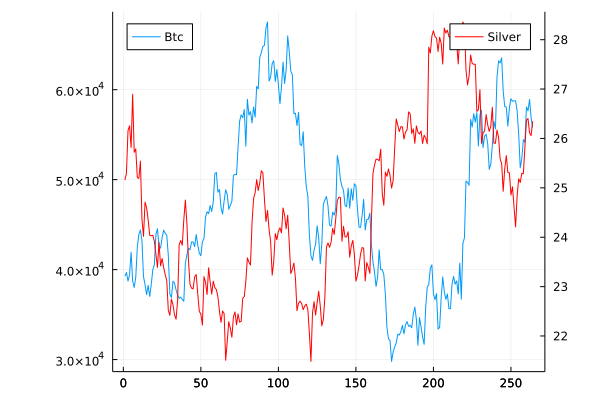

In [5]:
using Plots 
plot(dBPrice, label="Btc", legend=:topleft, rightmargin = 1.2Plots.cm, leftmargin = 1.2Plots.cm)
plot!(twinx(),dSPrice, label="Silver", color=:red)

Bitcoin con el oro:

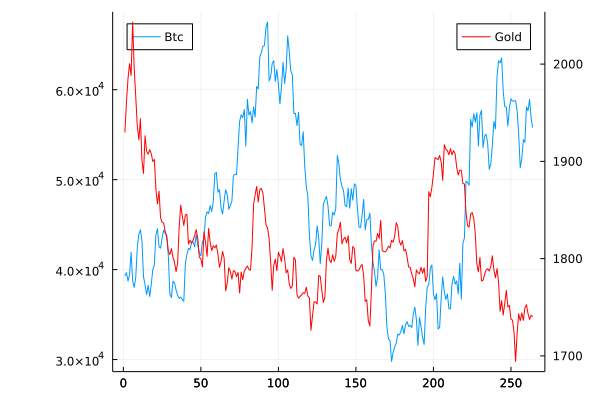

In [6]:
using Plots 
plot(dBPrice, label="Btc", legend=:topleft, rightmargin = 1.2Plots.cm, leftmargin = 1.2Plots.cm)
plot!(twinx(),dGPrice, label="Gold", color=:red)

Bitcoin con el petróleo:

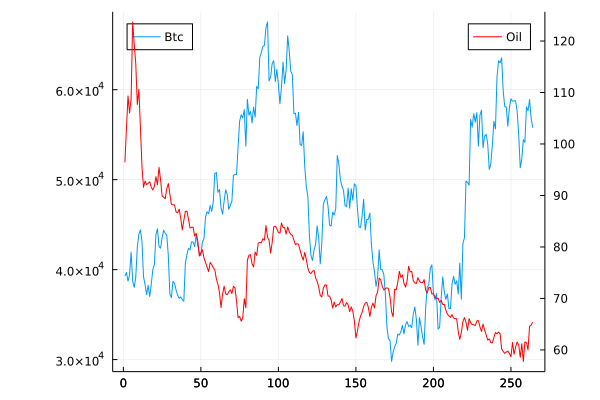

In [7]:
using Plots 
plot(dBPrice, label="Btc", legend=:topleft, rightmargin = 1.2Plots.cm, leftmargin = 1.2Plots.cm)
plot!(twinx(),dOPrice, label="Oil", color=:red)

Y con estas 3 gráficas se puede ver que el precio del Bitcoin no va a tener una relacion lineal con cada una de las materias primas pedidas.

---

**(Navegacion entre los ejercicios)**

Regresar a [Introducción_Tarea1.ipynb](Introducción_Tarea1.ipynb)

---

**Autor:** Alejandro Martin Salcedo

---